In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

# Reading the datasets

## Reading the global dataset

In [3]:
df = pd.read_csv("../../../../data/interim/Global-Dataset/global_dataset.csv")

<IPython.core.display.Javascript object>

## Reading the local dataset for plant W

In [4]:
df_w = pd.read_csv("../../../../data/processed/209/w.csv")

<IPython.core.display.Javascript object>

In [5]:
df_w.shape

(1011, 35)

<IPython.core.display.Javascript object>

In [6]:
df_w = df_w.rename({"Dolimita": "Dolomite"}, axis=1)

<IPython.core.display.Javascript object>

# Preprocessing of Global Dataset

### Removing the plant to be fine-tuned

In [7]:
df.shape

(66111, 48)

<IPython.core.display.Javascript object>

In [8]:
df = df[df["Factory_Plant"] != "209_W"].reset_index(drop=True)

<IPython.core.display.Javascript object>

In [9]:
df.shape

(65023, 48)

<IPython.core.display.Javascript object>

### Removing non-matching columns between the datasets

In [10]:
df = df[df_w.columns.to_list() + ["Factory_Plant"]]

<IPython.core.display.Javascript object>

In [11]:
df.shape

(65023, 36)

<IPython.core.display.Javascript object>

## Removing missing features

In [12]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
Alpha C2S,99.115698
Beta C2S,99.038802
Total C3S,95.623087
C3A,91.336912
Aphthitalite,90.411085
Quartz,90.294204
Calcite,90.263445
Arcanite,90.254218
Bassanite,89.739015
Orthorhombic C3A,89.646740


<IPython.core.display.Javascript object>

<Axes: >

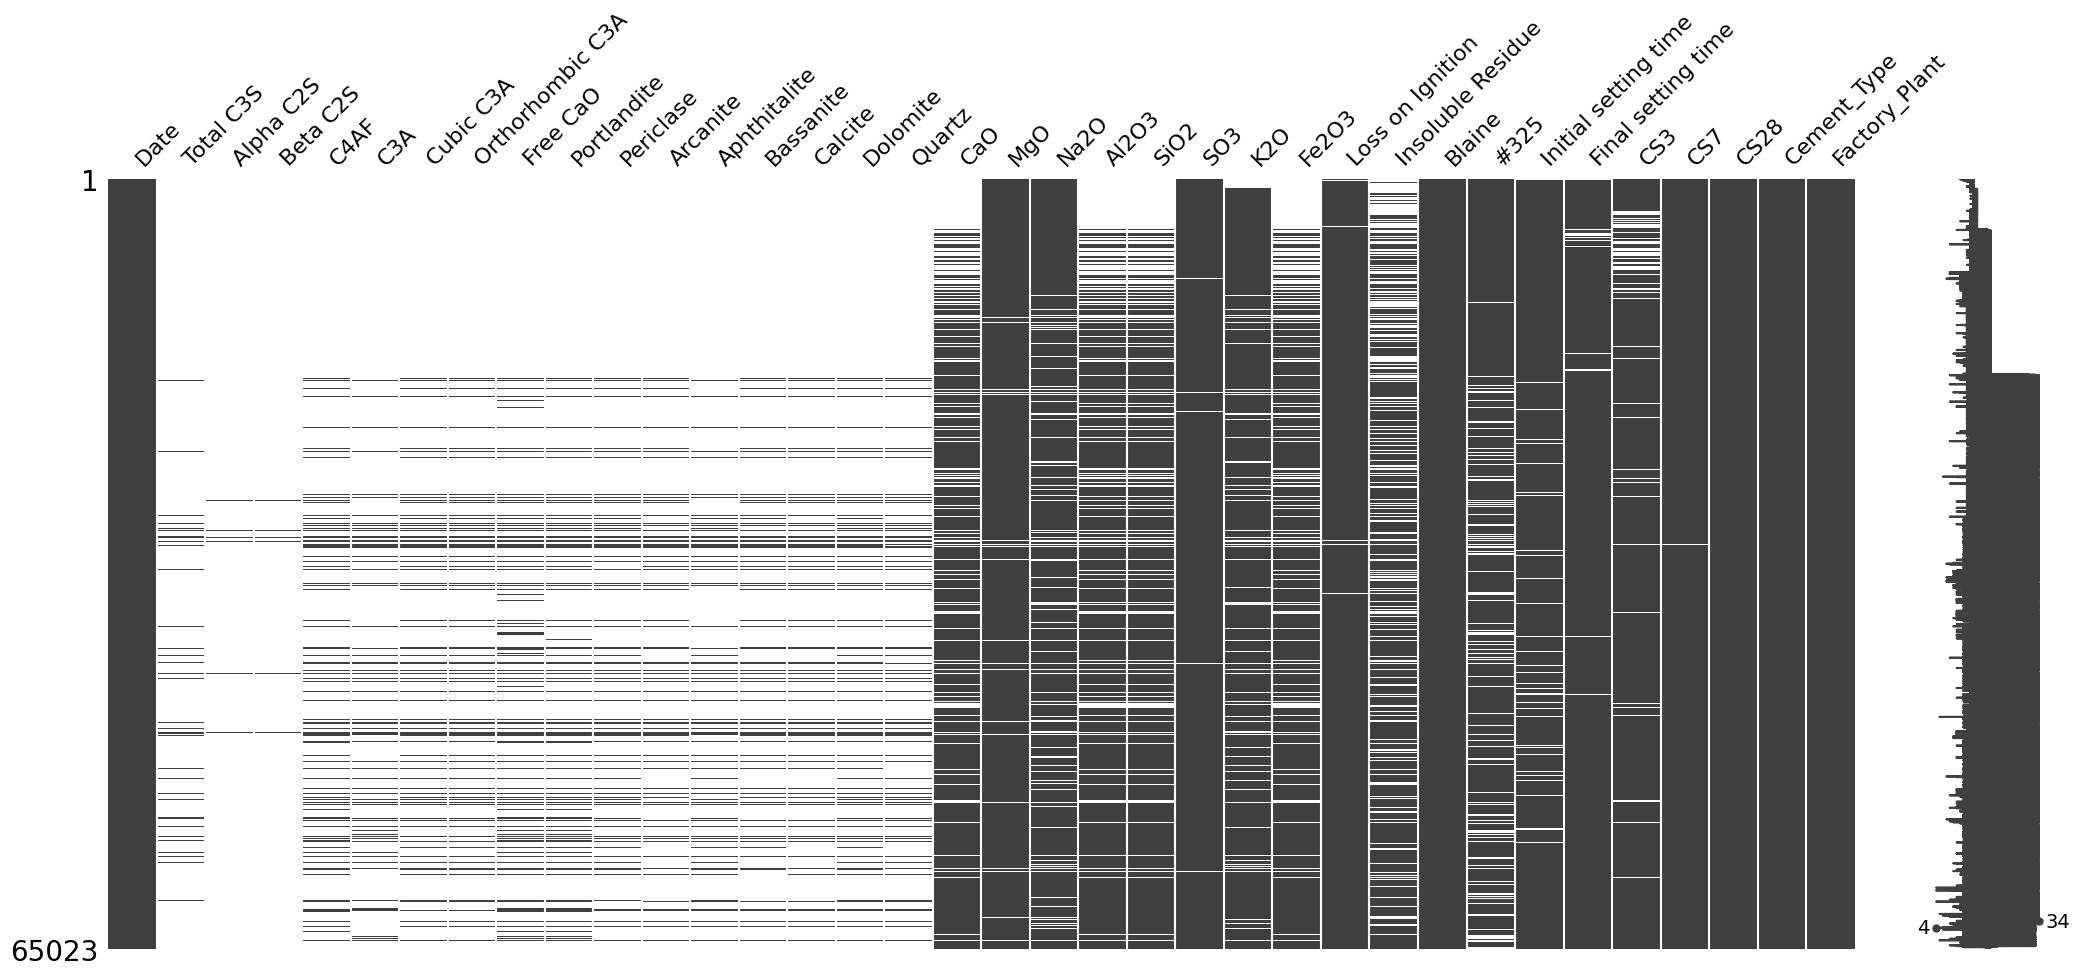

<IPython.core.display.Javascript object>

In [13]:
msno.matrix(df)

In [14]:
# msno.matrix(df.loc[(df["CS1"].notna() == True)])

<IPython.core.display.Javascript object>

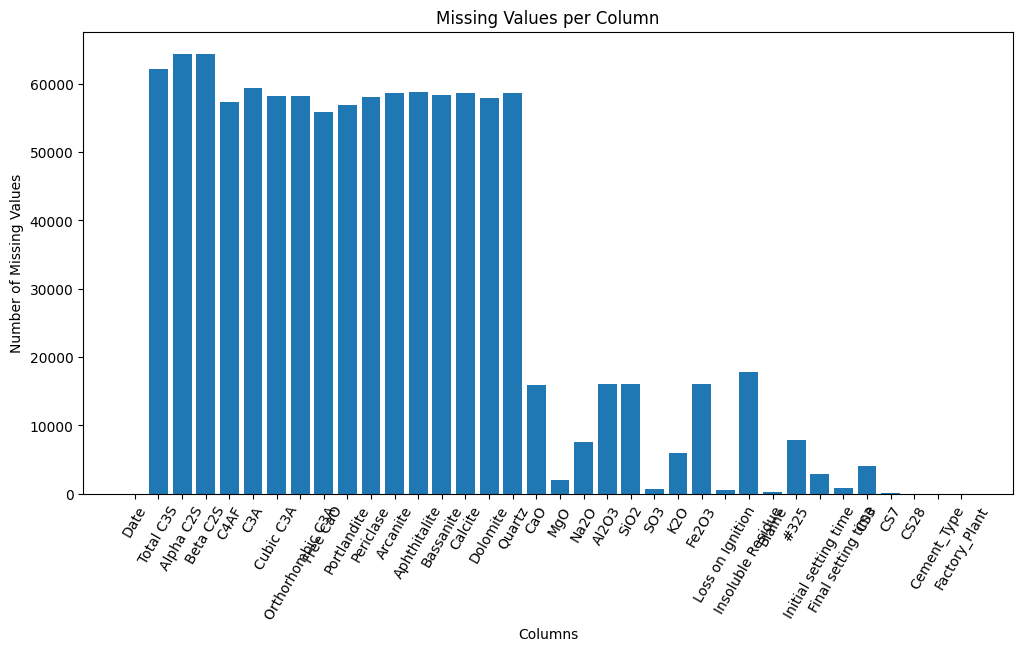

<IPython.core.display.Javascript object>

In [15]:
missing_counts = df.isnull().sum()
plt.figure(figsize=(12, 6))
plt.bar(missing_counts.index, missing_counts.values)
plt.xticks(rotation=60)
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Column")
plt.show()

### Removing features with many zeros when applicable

In [16]:
zero_values = {}
for col in df.select_dtypes(include="number").columns:
    zero_percentages = (df[df[col].eq(0)].shape[0] / df.shape[0]) * 100
    zero_values[col] = zero_percentages

zero_percentages = pd.Series(zero_values, name=f"Zero (%) for Global Dataset")
zero_percentages = zero_percentages.sort_values(ascending=False)
zero_percentages = zero_percentages.to_frame(name=f"Zero (%) for Global Dataset")
zero_percentages.style.background_gradient(cmap="Reds")

,Zero (%) for Global Dataset
Dolomite,7.055965
Arcanite,3.970903
Na2O,1.617889
Free CaO,1.594820
Orthorhombic C3A,1.144211
Aphthitalite,0.732049
Insoluble Residue,0.644387
#325,0.349107
Bassanite,0.226074
Loss on Ignition,0.101503


<IPython.core.display.Javascript object>

### Drop rows where the target variable is null

In [17]:
df = df[df["CS28"].notna()]

<IPython.core.display.Javascript object>

### Dropping rows where the target variable is zero

In [18]:
df = df[~df["CS28"].eq(0)]

<IPython.core.display.Javascript object>

### Dropping rows where any other variable has a zero value - except #200

In [19]:
for col in df.columns:
    if col != "#200":
        df = df[~df[col].eq(0)]

<IPython.core.display.Javascript object>

In [20]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
Alpha C2S,99.541571
Beta C2S,99.454748
Total C3S,98.473640
Arcanite,98.062096
Calcite,98.062096
Bassanite,98.022157
Quartz,97.935334
Aphthitalite,97.843301
C3A,97.820727
Periclase,97.688755


<IPython.core.display.Javascript object>

<Axes: >

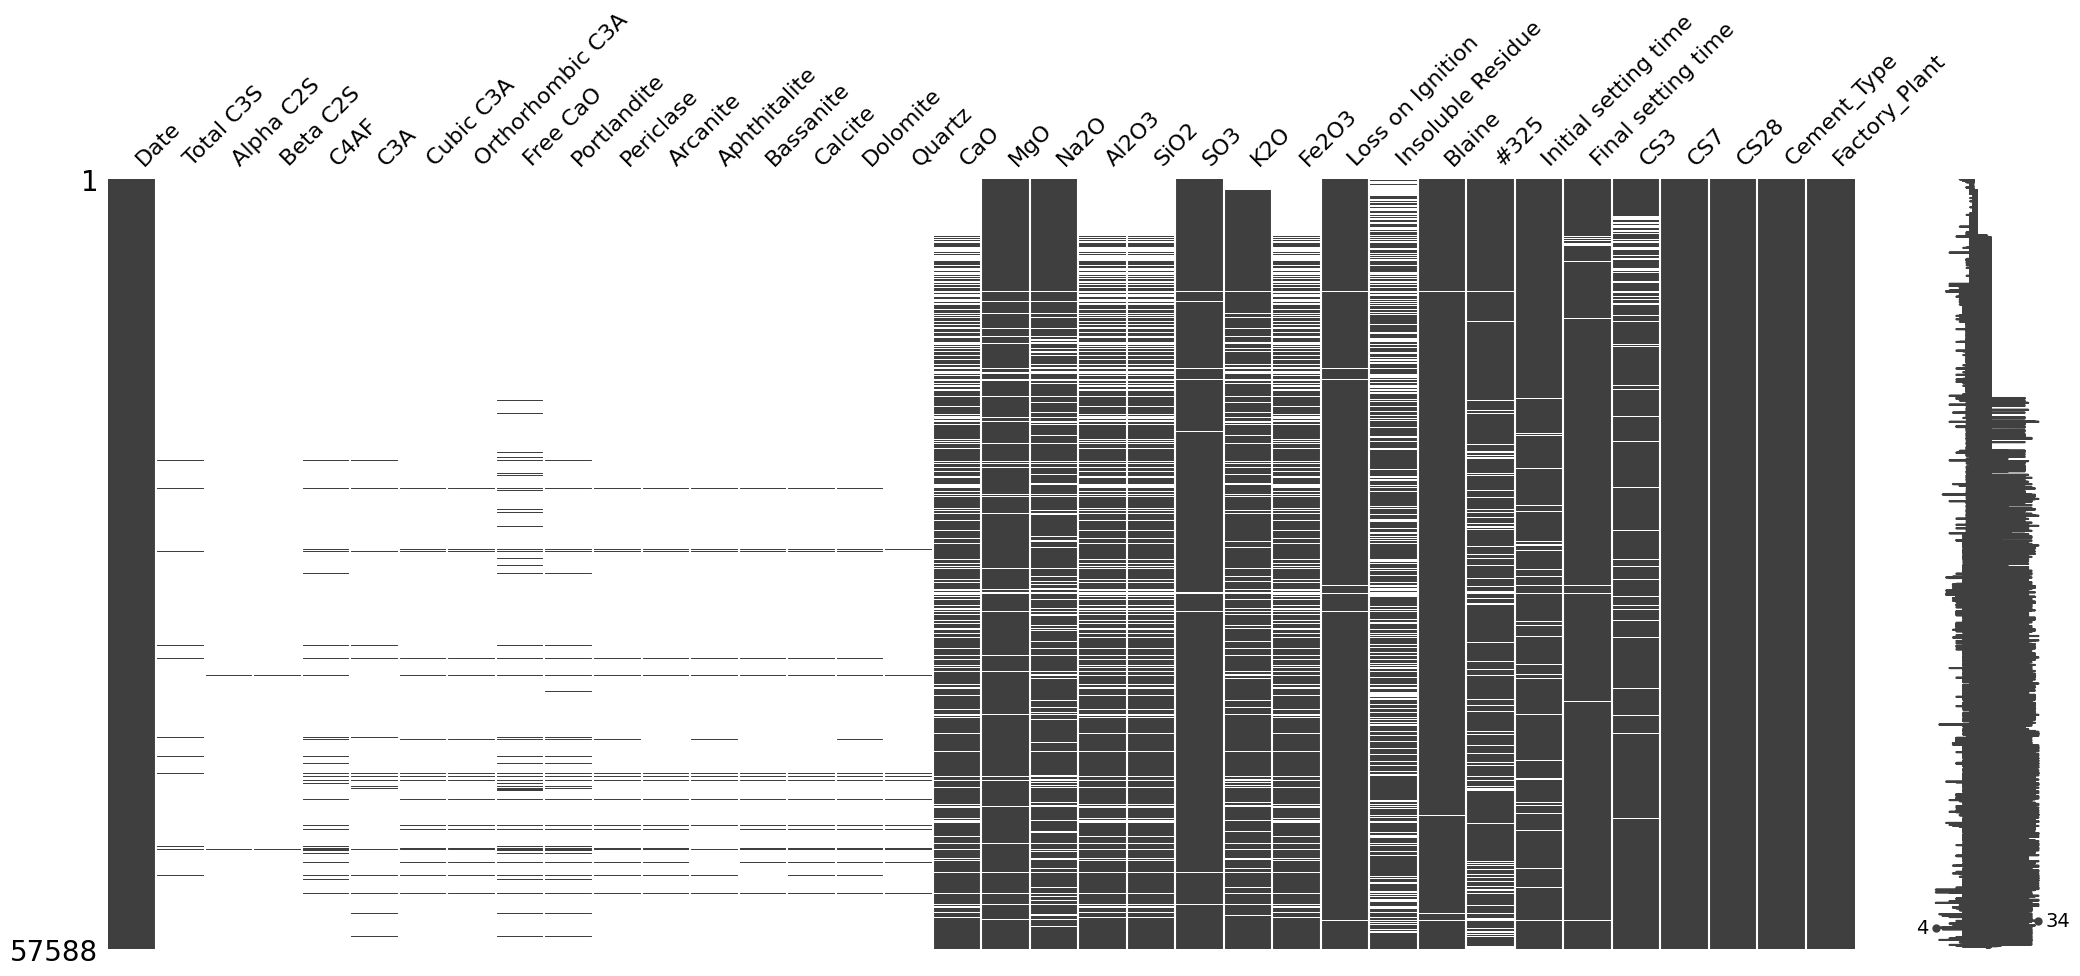

<IPython.core.display.Javascript object>

In [21]:
msno.matrix(df)

In [22]:
zero_values = {}
for col in df.select_dtypes(include="number").columns:
    zero_percentages = (df[df[col].eq(0)].shape[0] / df.shape[0]) * 100
    zero_values[col] = zero_percentages

zero_percentages = pd.Series(zero_values, name=f"Zero (%) for Global Dataset")
zero_percentages = zero_percentages.sort_values(ascending=False)
zero_percentages = zero_percentages.to_frame(name=f"Zero (%) for Global Dataset")
zero_percentages.style.background_gradient(cmap="Reds")

,Zero (%) for Global Dataset
Total C3S,0.000000
MgO,0.000000
CS7,0.000000
CS3,0.000000
Final setting time,0.000000
Initial setting time,0.000000
#325,0.000000
Blaine,0.000000
Insoluble Residue,0.000000
Loss on Ignition,0.000000


<IPython.core.display.Javascript object>

In [23]:
df.shape

(57588, 36)

<IPython.core.display.Javascript object>

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57588 entries, 0 to 65022
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  57588 non-null  object 
 1   Total C3S             879 non-null    float64
 2   Alpha C2S             264 non-null    float64
 3   Beta C2S              314 non-null    float64
 4   C4AF                  1971 non-null   float64
 5   C3A                   1255 non-null   float64
 6   Cubic C3A             1342 non-null   float64
 7   Orthorhombic C3A      1342 non-null   float64
 8   Free CaO              3370 non-null   float64
 9   Portlandite           2293 non-null   float64
 10  Periclase             1331 non-null   float64
 11  Arcanite              1116 non-null   float64
 12  Aphthitalite          1242 non-null   float64
 13  Bassanite             1139 non-null   float64
 14  Calcite               1116 non-null   float64
 15  Dolomite              13

<IPython.core.display.Javascript object>

### Dropping columns with significant amount of missing values

In [25]:
cols_missing_vals_to_drop = [
    "Total C3S",
    "Alpha C2S",
    "Beta C2S",
    "C4AF",
    "C3A",
    "Cubic C3A",
    "Orthorhombic C3A",
    "Free CaO",
    "Portlandite",
    "Periclase",
    "Arcanite",
    "Aphthitalite",
    "Bassanite",
    "Calcite",
    "Dolomite",
    "Quartz",
]
df = df.drop(cols_missing_vals_to_drop, axis=1).reset_index(drop=True)

<IPython.core.display.Javascript object>

<Axes: >

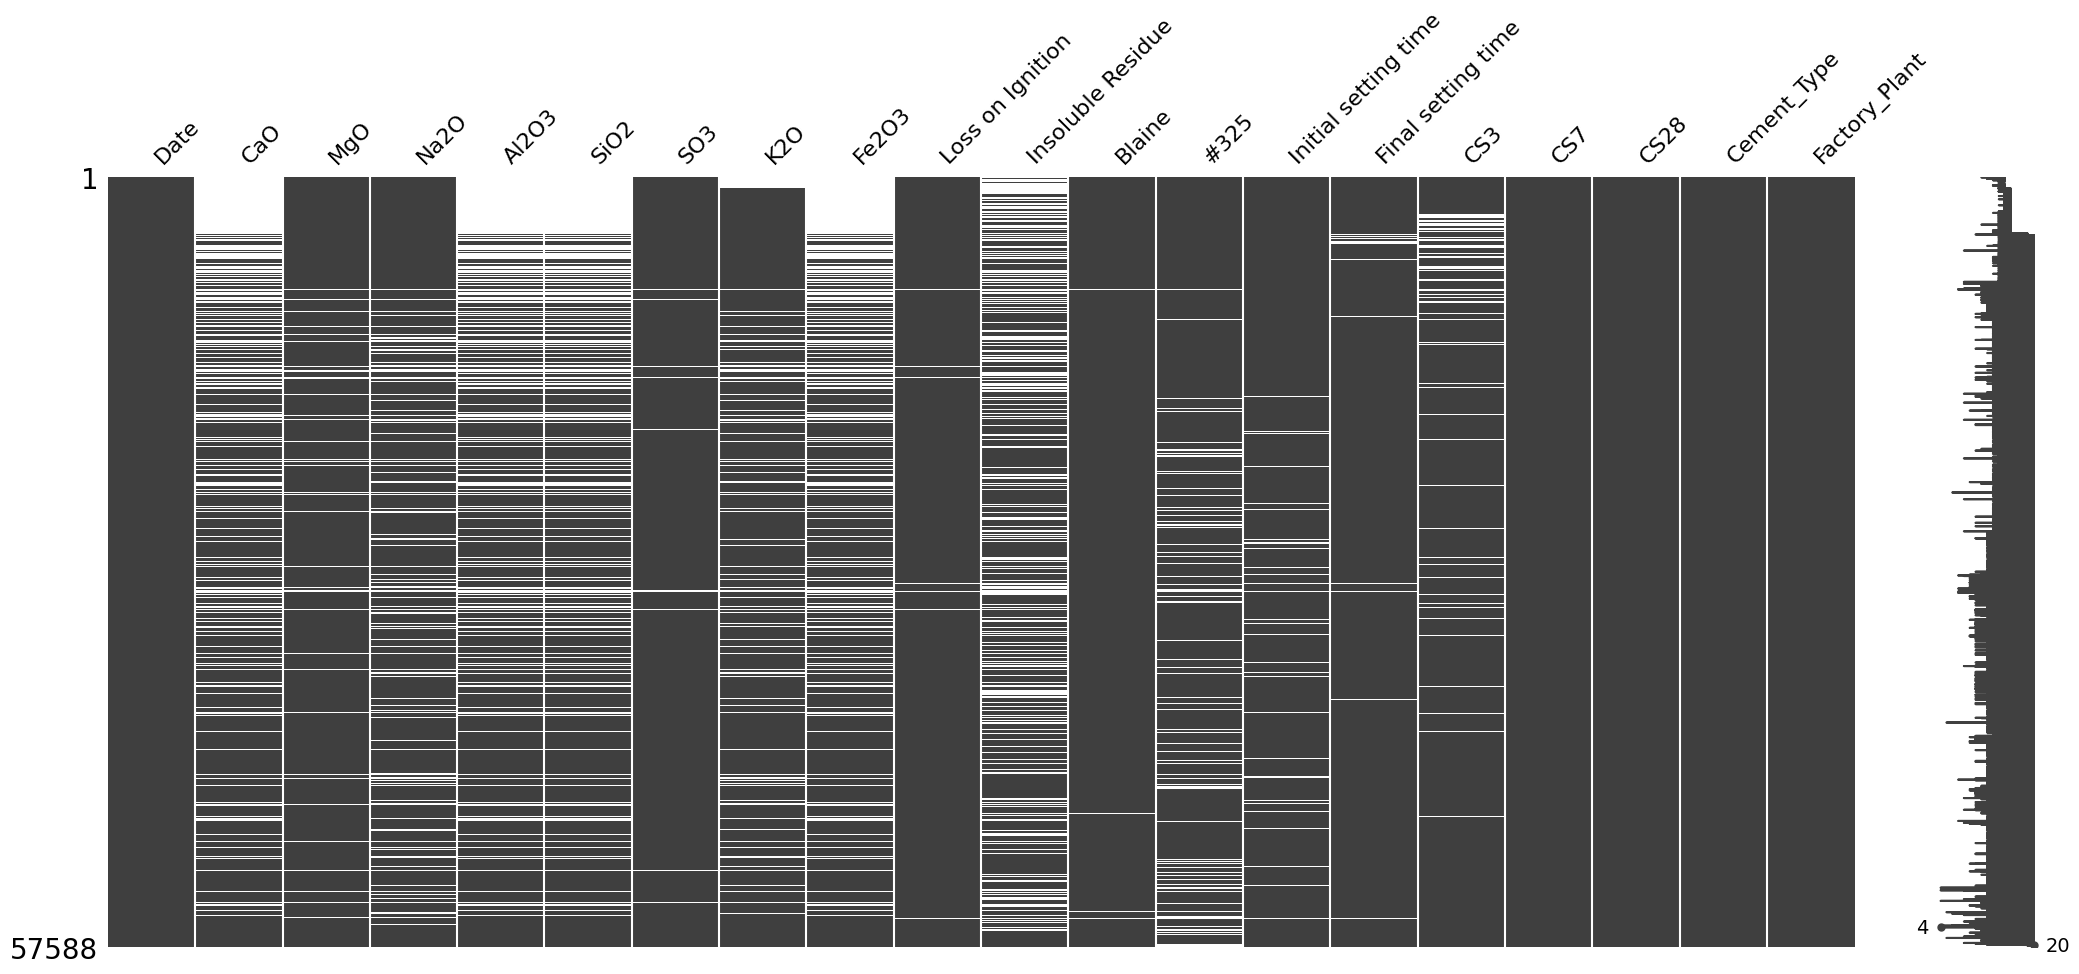

<IPython.core.display.Javascript object>

In [26]:
msno.matrix(df)

### Sort the dataset by date

In [27]:
df["Date"] = pd.to_datetime(df["Date"])

<IPython.core.display.Javascript object>

In [28]:
df = df.sort_values(by="Date")

<IPython.core.display.Javascript object>

## Saving the dataset

<h3>Saving for feature engineering</h3>

In [29]:
df.to_csv("../../../../data/interim/209/global_w.csv", index=False)

<IPython.core.display.Javascript object>